In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from pandas_summary import DataFrameSummary
import datetime

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load preprocessed data

In [3]:
df = pd.read_feather('train_normalized_data.fth')
df_test = pd.read_feather('test_normalized_data.fth')

## Show df info

In [4]:
print(len(df))
print(len(df.columns))
display(df.head())
display(DataFrameSummary(df).summary())

844338
82


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1
1,1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,...,0.965073,1.072424,0,0,5,0,5,1,0,1
2,2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1
3,3,3,4,2015-07-31,13995,1498,1,1.273237,0,2.144211,...,0.965073,1.072424,0,0,5,0,5,1,0,1
4,4,4,4,2015-07-31,4822,559,1,1.273237,0,2.144211,...,0.644376,1.072424,0,0,5,0,5,1,0,1


C:\Users\marco\AppData\Local\Temp\ipykernel_8308\2860104315.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(df).summary())


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
count,844338.0,844338.0,844338.0,NaN,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,...,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0,844338.0
mean,508610.35162,557.421374,2.52035,NaN,6955.959134,762.777166,1.0,0.133484,0.001418,0.038979,...,0.043288,-0.035657,2.783563,-2.869317,1.193387,0.176589,2.647116,1.184983,0.169327,2.69559
std,293698.99876,321.730861,1.723712,NaN,3103.815515,401.194153,0.0,1.023378,0.047578,1.031446,...,0.994421,0.996632,4.913429,3.193761,2.01866,0.437335,1.794482,2.013705,0.430947,1.782725
min,0.0,0.0,0.0,NaN,46.0,8.0,1.0,-0.7854,0.0,-0.466372,...,-1.183596,-4.861401,0.0,-16.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,256009.25,279.0,1.0,NaN,4859.0,519.0,1.0,-0.7854,0.0,-0.466372,...,-0.830829,-0.722938,0.0,-5.0,0.0,0.0,1.0,0.0,0.0,1.0
50%,510142.5,557.0,2.0,NaN,6369.0,676.0,1.0,-0.7854,0.0,-0.466372,...,-0.221505,0.250818,1.0,-2.0,0.0,0.0,3.0,0.0,0.0,3.0
75%,763017.75,836.0,4.0,NaN,8360.0,893.0,1.0,1.273237,0.0,-0.466372,...,0.740585,0.828985,5.0,0.0,2.0,0.0,4.0,2.0,0.0,4.0
max,1017190.0,1114.0,6.0,NaN,41551.0,7388.0,1.0,1.273237,3.0,2.144211,...,3.145812,1.072424,188.0,0.0,7.0,2.0,5.0,7.0,2.0,5.0
counts,844338,844338,844338,844338,844338,844338,844338,844338,844338,844338,...,844338,844338,844338,844338,844338,844338,844338,844338,844338,844338
uniques,844338,1115,7,942,21733,4083,1,2,4,2,...,136,147,21,17,8,3,6,8,3,6


## Categorical variables

In [4]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']
print(len(cat_vars))

22


## Continuous variables

In [5]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']
print(len(contin_vars))

18


Veo valores unicos en cada variable categorica

In [6]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3


# Model definition

#### Defino las features a utilizar

In [7]:
cat_vars = ['Store', 'DayOfWeek', 'Promo_bw', 'Day', 'Month', 'Year', 'State', 'Assortment', 'StoreType', 'Events', 'StateHoliday', 'Promo2SinceYear'] #, 'PromoInterval', 'Promo2Weeks']

contin_vars = [ 'Max_TemperatureC', 'Precipitationmm', 'Promo', 'SchoolHoliday', 'Max_Wind_SpeedKm_h', 'trend', 'Mean_TemperatureC'] #, 'Max_Wind_SpeedKm_h'] #, 'CompetitionDistance'] #,'BeforeStateHoliday_bool']

#### Separo datos en train y validation

In [8]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


#### Se calcula meadia de ventas por store como baseline

In [9]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()
    
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

C:\Users\marco\AppData\Local\Temp\ipykernel_11072\1524812702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
C:\Users\marco\AppData\Local\Temp\ipykernel_11072\1524812702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)
C:\Users\marco\AppData\Local\Temp\ipykernel_11072\1524812702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [10]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred)/y_true)**2))

rmspe(df_val['Sales'].values, df_val['mean_by_store'])

0.3071746085338871

In [11]:
all_vars = cat_vars + contin_vars

X_train = df_train[all_vars]
X_val = df_val[all_vars]
X_test = df_test[all_vars]
X_full = df[all_vars]

X_train.shape, X_val.shape

((814150, 19), (30188, 19))

In [12]:
log_output = True

y_out_columns = ['Sales']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns]),axis=0).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
    y_full = np.log(df[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
    y_full = df[y_out_columns].values/y_max


# LightGBM model

n_estimators: (int, optional (default=100)) – Number of boosted trees to fit.

num_leaves: set the maximum number of leaves each weak learner has. Large num_leaves increases accuracy on the training set and also the chance of getting hurt by overfitting. According to the documentation, one simple way is that num_leaves = 2^(max_depth) 

max_bin: default = 255, max number of bins that feature values will be bucketed in, small number of bins may reduce training accuracy but may increase general power (deal with over-fitting)

min_data_in_leaf: default = 20, alias of min_child_samples. Minimal number of data in one leaf. Can be used to deal with over-fitting

In [14]:
from lightgbm import LGBMRegressor

In [54]:
hyper_params = { 'min_child_samples' : 5, #alias of min_data_in_leaf
                 'n_estimators'      : 4000,
                 'learning_rate'     : 0.05,                
               }
model = LGBMRegressor(**hyper_params)

fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'l2', 
            "eval_set" : [(X_val, y_val.reshape(-1))],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': cat_vars
           }
model.fit(X_train, y_train.reshape(-1), **fit_params)

C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Assortment', 'Day', 'DayOfWeek', 'Events', 'Month', 'Promo2SinceYear', 'Promo_bw', 'State', 'StateHoliday', 'Store', 'StoreType', 'Year']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.forma

Training until validation scores don't improve for 100 rounds
[100]	valid's l2: 0.000225046
[200]	valid's l2: 0.000174147
[300]	valid's l2: 0.0001595
[400]	valid's l2: 0.000151948
[500]	valid's l2: 0.00014606
[600]	valid's l2: 0.000143005
[700]	valid's l2: 0.00014103
[800]	valid's l2: 0.000139093
[900]	valid's l2: 0.000136868
[1000]	valid's l2: 0.000135007
[1100]	valid's l2: 0.000133576
[1200]	valid's l2: 0.000131511
[1300]	valid's l2: 0.000130174
[1400]	valid's l2: 0.000128629
[1500]	valid's l2: 0.000127794
[1600]	valid's l2: 0.000126507
[1700]	valid's l2: 0.000126072
[1800]	valid's l2: 0.000125388
[1900]	valid's l2: 0.000124899
[2000]	valid's l2: 0.000124632
[2100]	valid's l2: 0.000124561
Early stopping, best iteration is:
[2070]	valid's l2: 0.000124387


LGBMRegressor(learning_rate=0.05, min_child_samples=5, n_estimators=4000)

In [55]:
model.score(X_val, y_val)

0.912864567368095

In [56]:
if log_output:
    y_pred_train = np.exp(model.predict(X_train, verbose=1)*max_log_y)
    y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)
    y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)
else:
    y_pred_train = model.predict(X_train, verbose=1)*y_max #*y_std + y_mean
    y_pred = model.predict(X_val, verbose=1)*y_max #*y_std + y_mean
    y_pred_test = model.predict(X_test, verbose=1)*y_max #*y_std + y_mean

In [57]:
# Train
rmspe(df_train['Sales'].values, y_pred_train)

0.10528382579319498

In [58]:
# Validación
rmspe(df_val['Sales'].values, y_pred)

0.12123276555069551

# Grid search hiperparameters tunning

In [15]:
from sklearn.model_selection import GridSearchCV

In [100]:
# parameters = {
#     'min_child_samples' : [5, 15],     #DEFAULT: 20
#     'n_estimators'      : [1000, 2000, 4000],   #DEFAULT: 100
#     'learning_rate'     : [0.1, 0.05, 0.03],   #DEFAULT: 0.1
#     'max_depth'         : [10,-1],     #DEFAULT: -1
#     'num_leaves'        : [45, 31, 15],   #DEFAULT: 31
#     'reg_alpha'         : [0, 0.1, 0.01], #DEFAULT: 0, L1 reg term
#     'reg_lambda'        : [0, 0.1, 0.01], #DEFAULT: 0, L2 reg term
# }

# parameters = {
#     'min_child_samples' : [10],     #DEFAULT: 20
#     'n_estimators'      : [4000],   #DEFAULT: 100
#     'learning_rate'     : [0.05],   #DEFAULT: 0.1
#     'max_depth'         : [15],     #DEFAULT: -1
#     'num_leaves'        : [40],   #DEFAULT: 31
#     'reg_alpha'         : [0.01], #DEFAULT: 0, L1 reg term
#     # 'reg_lambda'        : [0], #DEFAULT: 0, L2 reg term
# }

parameters = {
    'min_child_samples' : [7],     #DEFAULT: 20
    'n_estimators'      : [7000],   #DEFAULT: 100
    'learning_rate'     : [0.01],   #DEFAULT: 0.1
    'max_depth'         : [18],     #DEFAULT: -1
    'num_leaves'        : [40],   #DEFAULT: 31
    'reg_alpha'         : [0.1], #DEFAULT: 0, L1 reg term
    #'reg_lambda'        : [0.05], #DEFAULT: 0, L2 reg term
}

k_fold = 3
model = LGBMRegressor()

from sklearn.metrics import make_scorer
#define  custom metric and set greater_is_better=False
my_rmspe = make_scorer(rmspe,greater_is_better=False)
# then define scoring=my_rmse on GridSearchCV

clf = GridSearchCV(model, parameters, n_jobs = 8, verbose=100, cv=k_fold, scoring=my_rmspe) #'neg_root_mean_squared_error')

fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'l2', # l2 is MSE
            "eval_set" : [(X_val, y_val.reshape(-1))], #, (X_full, y_full.reshape(-1))],
            'eval_names': ['val'], #,'train'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': cat_vars
           }
clf.fit(X_train, y_train.reshape(-1), **fit_params)
#clf.fit(X_full, y_full.reshape(-1), **fit_params)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Assortment', 'Day', 'DayOfWeek', 'Events', 'Month', 'Promo2SinceYear', 'Promo_bw', 'State', 'StateHoliday', 'Store', 'StoreType', 'Year']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.forma

Training until validation scores don't improve for 100 rounds
[100]	val's l2: 0.000479233
[200]	val's l2: 0.000314171
[300]	val's l2: 0.000259507
[400]	val's l2: 0.000230844
[500]	val's l2: 0.000212087
[600]	val's l2: 0.000197092
[700]	val's l2: 0.000186041
[800]	val's l2: 0.000175999
[900]	val's l2: 0.0001703
[1000]	val's l2: 0.000165517
[1100]	val's l2: 0.000162137
[1200]	val's l2: 0.000159349
[1300]	val's l2: 0.000157842
[1400]	val's l2: 0.000156399
[1500]	val's l2: 0.000155085
[1600]	val's l2: 0.00015285
[1700]	val's l2: 0.000150767
[1800]	val's l2: 0.000149154
[1900]	val's l2: 0.000148054
[2000]	val's l2: 0.00014688
[2100]	val's l2: 0.00014542
[2200]	val's l2: 0.000144851
[2300]	val's l2: 0.00014407
[2400]	val's l2: 0.000143007
[2500]	val's l2: 0.000142094
[2600]	val's l2: 0.000141377
[2700]	val's l2: 0.000140691
[2800]	val's l2: 0.000140168
[2900]	val's l2: 0.000139791
[3000]	val's l2: 0.000139325
[3100]	val's l2: 0.000138697
[3200]	val's l2: 0.000138203
[3300]	val's l2: 0.000137

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=8,
             param_grid={'learning_rate': [0.01], 'max_depth': [18],
                         'min_child_samples': [7], 'n_estimators': [7000],
                         'num_leaves': [40], 'reg_alpha': [0.1]},
             scoring=make_scorer(rmspe, greater_is_better=False), verbose=100)

In [101]:
if log_output:
    y_pred_train = np.exp(clf.predict(X_train)*max_log_y)
    y_pred = np.exp(clf.predict(X_val)*max_log_y)
    y_pred_test = np.exp(clf.predict(X_test)*max_log_y)
else:
    y_pred_train = clf.predict(X_train)*y_max #*y_std + y_mean
    y_pred = clf.predict(X_val)*y_max #*y_std + y_mean
    y_pred_test = clf.predict(X_test)*y_max #*y_std + y_mean

In [102]:
# Train
rmspe(df_train['Sales'].values, y_pred_train)

0.11524485105685645

In [103]:
# Validación
rmspe(df_val['Sales'].values, y_pred)

0.12274851202459768

In [86]:
clf.best_params_

{'learning_rate': 0.02,
 'max_depth': 18,
 'min_child_samples': 7,
 'n_estimators': 4000,
 'num_leaves': 40,
 'reg_alpha': 0.1}

In [85]:
clf.best_score_

-0.016895282657672567

In [44]:
clf.best_estimator_.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': 15,
 'min_child_samples': 10,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 4000,
 'n_jobs': -1,
 'num_leaves': 40,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.01,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [45]:
#clf.score(X_val, y_val)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

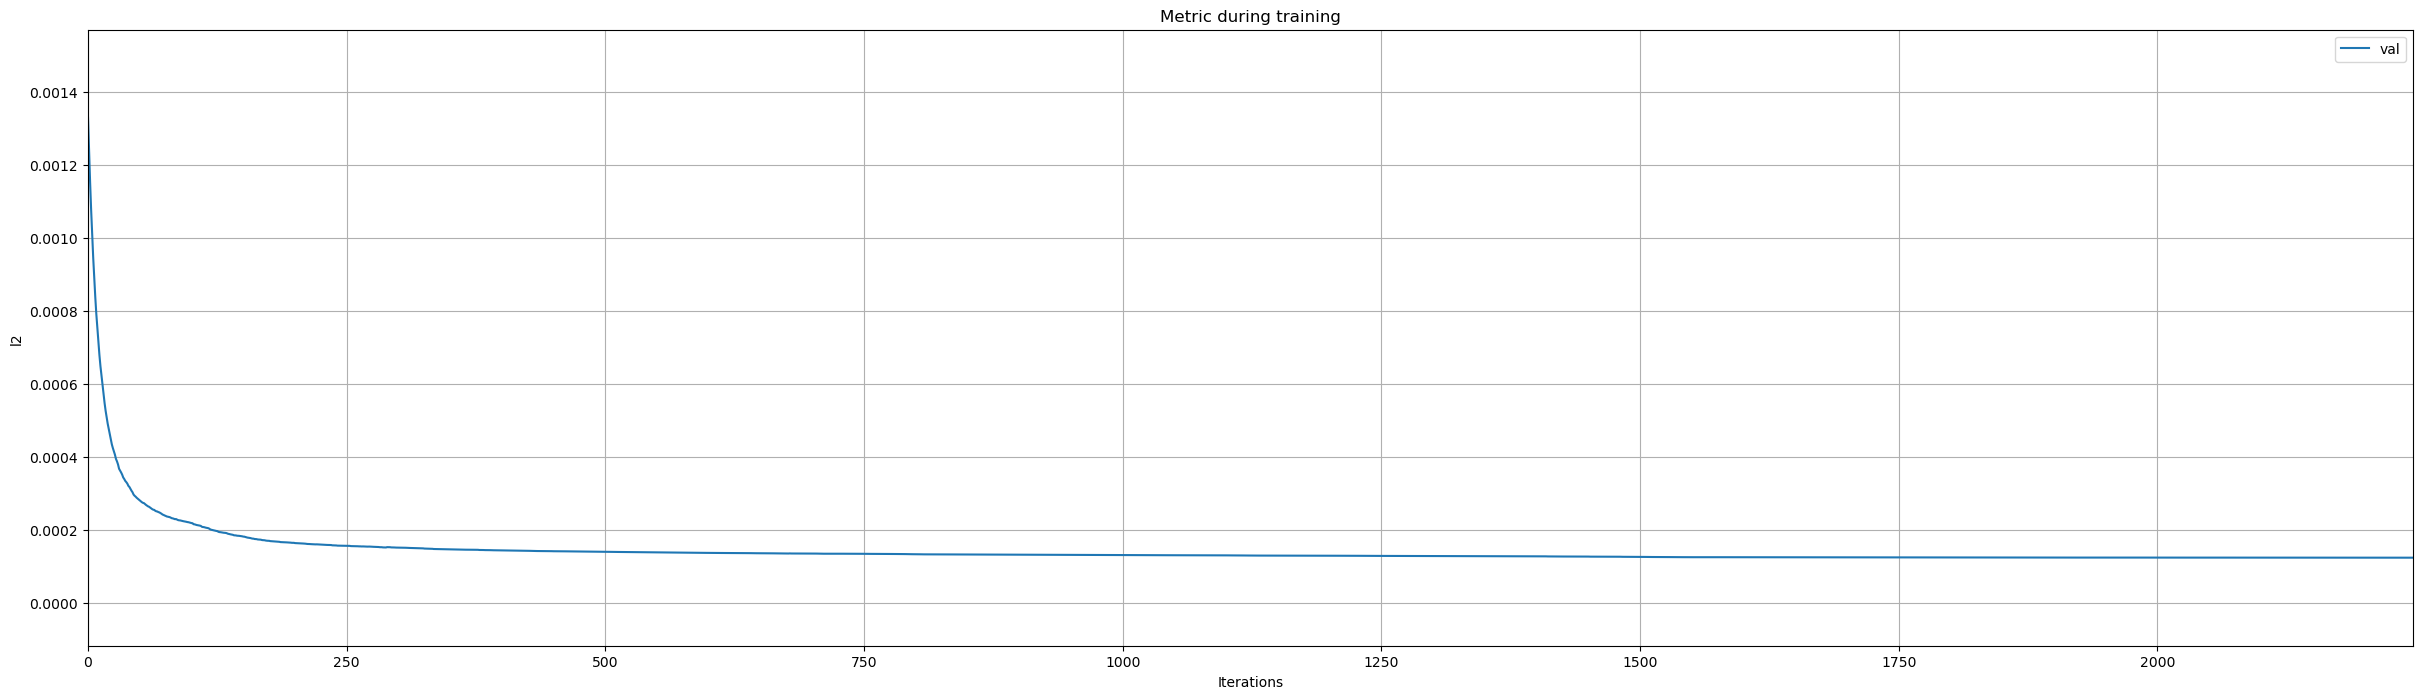

In [49]:
from lightgbm import plot_metric,plot_importance
plot_metric(clf.best_estimator_,figsize=(30,8))

,feature,importance
0,Store,75137
3,Day,22880
4,Month,12472
1,DayOfWeek,8417
17,trend,5853
2,Promo_bw,4027
6,State,3870
12,Max_TemperatureC,3846
9,Events,2827
18,Mean_TemperatureC,2642


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

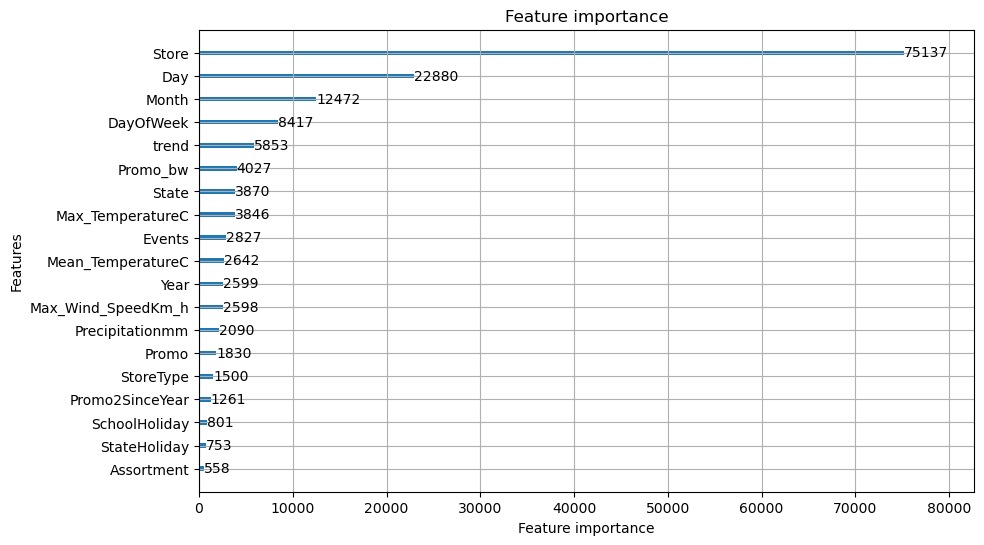

In [84]:
df_feature_importance = (
    pd.DataFrame({
        'feature': clf.best_estimator_.feature_name_,
        'importance': clf.best_estimator_.feature_importances_,
    })
    .sort_values('importance', ascending=False)
)

display(df_feature_importance)

plot_importance(clf.best_estimator_, figsize=(10,6))

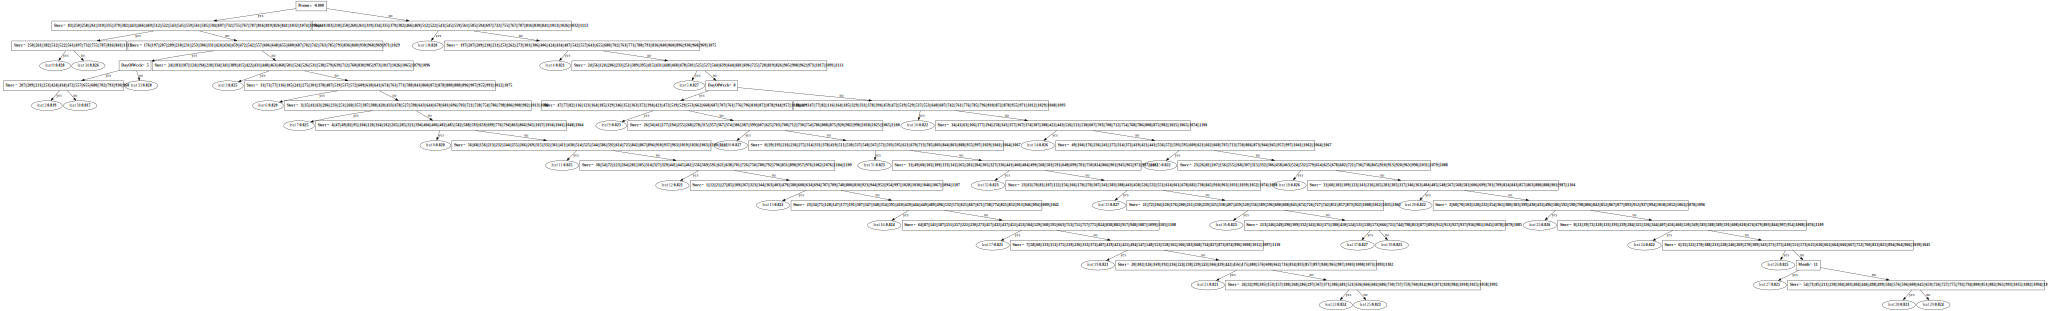

In [51]:
from lightgbm import create_tree_digraph, plot_tree

#plot_tree(clf.best_estimator_, orientation='vertical', dpi=800)
create_tree_digraph(clf.best_estimator_,orientation='vertical',tree_index=0)

<AxesSubplot:title={'center':'Split value histogram for feature with name Max_TemperatureC'}, xlabel='Feature split value', ylabel='Count'>

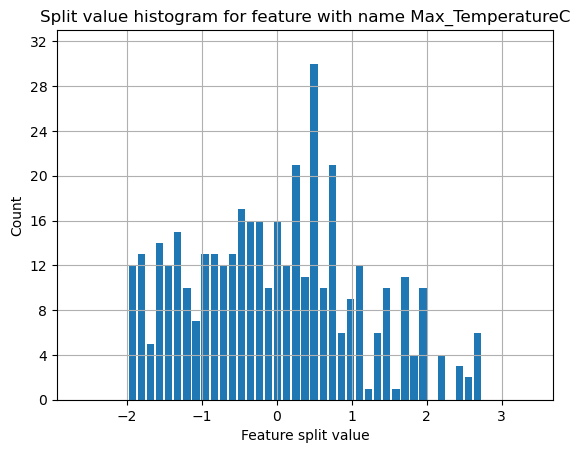

In [69]:
from lightgbm import plot_split_value_histogram
plot_split_value_histogram(clf.best_estimator_,'Max_TemperatureC')

# Final train with tuned hiperparameters

In [107]:
hyper_params = { 'min_child_samples' : 7,
                 'n_estimators'      : 8000,
                 'learning_rate'     : 0.02,  
                 'max_depth'         : 18,
                 'num_leaves'        : 40,
                 'reg_alpha'         : 0.1,
               }
model = LGBMRegressor(**hyper_params)

fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'l2', 
            "eval_set" : [(X_val, y_val.reshape(-1))],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': cat_vars
           }
model.fit(X_train, y_train.reshape(-1), **fit_params)

C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Assortment', 'Day', 'DayOfWeek', 'Events', 'Month', 'Promo2SinceYear', 'Promo_bw', 'State', 'StateHoliday', 'Store', 'StoreType', 'Year']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.forma

Training until validation scores don't improve for 100 rounds
[100]	valid's l2: 0.000312298
[200]	valid's l2: 0.000233323
[300]	valid's l2: 0.000197884
[400]	valid's l2: 0.000176411
[500]	valid's l2: 0.000164304
[600]	valid's l2: 0.000157253
[700]	valid's l2: 0.000154178
[800]	valid's l2: 0.000150495
[900]	valid's l2: 0.000146095
[1000]	valid's l2: 0.000143447
[1100]	valid's l2: 0.000141742
[1200]	valid's l2: 0.000140405
[1300]	valid's l2: 0.000138781
[1400]	valid's l2: 0.000137872
[1500]	valid's l2: 0.000136681
[1600]	valid's l2: 0.000135707
[1700]	valid's l2: 0.000134986
[1800]	valid's l2: 0.000133256
[1900]	valid's l2: 0.000132034
[2000]	valid's l2: 0.000131257
[2100]	valid's l2: 0.000130496
[2200]	valid's l2: 0.000129857
[2300]	valid's l2: 0.000129107
[2400]	valid's l2: 0.00012836
[2500]	valid's l2: 0.000127898
[2600]	valid's l2: 0.000127545
[2700]	valid's l2: 0.000127023
[2800]	valid's l2: 0.000126613
[2900]	valid's l2: 0.000126151
[3000]	valid's l2: 0.000125803
[3100]	valid's l2:

LGBMRegressor(learning_rate=0.02, max_depth=18, min_child_samples=7,
              n_estimators=8000, num_leaves=40, reg_alpha=0.1)

In [88]:
model.score(X_val, y_val)

0.9576172657813139

In [108]:
if log_output:
    y_pred_train = np.exp(model.predict(X_train, verbose=1)*max_log_y)
    y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)
    y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)
else:
    y_pred_train = model.predict(X_train, verbose=1)*y_max #*y_std + y_mean
    y_pred = model.predict(X_val, verbose=1)*y_max #*y_std + y_mean
    y_pred_test = model.predict(X_test, verbose=1)*y_max #*y_std + y_mean

In [109]:
# Train
rmspe(df_train['Sales'].values, y_pred_train)

0.10069889812598759

In [110]:
# Validación
rmspe(df_val['Sales'].values, y_pred)

0.1208093372351432

## Test predictions to submit

In [111]:
y_pred_test[df_test['Open'] == 0] = 0

In [112]:
sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()

min_child_samples = clf.best_params_['min_child_samples']
n_estimators = clf.best_params_['n_estimators']
learning_rate = clf.best_params_['learning_rate']
sample_csv.to_csv(f'submision_lightgbm_gridsearch6_{log_output}-{min_child_samples}-{n_estimators}-{learning_rate}.csv', index=False)

# XGboost model

n_estimators: (int, optional (default=100)) – Number of boosted trees to fit.

num_leaves: set the maximum number of leaves each weak learner has. Large num_leaves increases accuracy on the training set and also the chance of getting hurt by overfitting. According to the documentation, one simple way is that num_leaves = 2^(max_depth) 

max_bin: default = 255, max number of bins that feature values will be bucketed in, small number of bins may reduce training accuracy but may increase general power (deal with over-fitting)

min_data_in_leaf: default = 20, alias of min_child_samples. Minimal number of data in one leaf. Can be used to deal with over-fitting

## Categorical columns transformation

In [13]:
# categoricals_processing = 'no_categoricals'
#categoricals_processing = 'use_onehotencoding'
categoricals_processing = 'use_embeddings'


In [14]:
from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder

if categoricals_processing == 'use_embeddings':
    embeddings_model = load_model('embeddings_model.hdf5')
    X_train = embeddings_model.predict(np.hsplit(X_train, X_train.shape[1]), verbose=1)
    X_val = embeddings_model.predict(np.hsplit(X_val, X_val.shape[1]), verbose=1)
    X_test = embeddings_model.predict(np.hsplit(X_test, X_test.shape[1]), verbose=1)

elif categoricals_processing == 'use_onehotencoding':
    # Use One Hot Encoding
    X_train_cat = df_train[cat_vars]
    X_val_cat   = df_val[cat_vars]
    X_test_cat  = df_test[cat_vars]
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(X_train_cat)
    X_train_ohe = pd.DataFrame(ohe.transform(X_train_cat,"pandas"))
    X_train_ohe.index = X_train_cat.index
    X_val_ohe = pd.DataFrame(ohe.transform(X_val_cat))
    X_val_ohe.index = X_val_cat.index
    X_test_ohe = pd.DataFrame(ohe.transform(X_test_cat))
    X_test_ohe.index = X_test_cat.index    
    X_train =  pd.concat([X_train_ohe, df_train[contin_vars]])
    X_val = pd.concat([X_val_ohe, df_val[contin_vars]])
    X_test = pd.concat([X_test_ohe, df_test[contin_vars]])

1284/1284 [==============================] - 2s 2ms/step


### Model definition

In [15]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

C:\Users\marco\anaconda3\envs\cursoDL_python38\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [48]:
# hyper_params = { 'n_estimators'      : 3000,
#                  'learning_rate'     : 0.2, 
#                  'max_depth'         : 12,
#                  'max_leaves'        : 0, #DEFAULT: 0 (unlimited)
#                  'gamma'             : 0.003,
#                  'reg_alpha'         : 0.1,
#                }
hyper_params = { 'n_estimators'      : 4000,
                 'learning_rate'     : 0.2, 
                 'max_depth'         : 13,
                 'max_leaves'        : 0, #DEFAULT: 0 (unlimited)
                 'gamma'             : 0.004,
                 'reg_alpha'         : 0.07,
                 #'reg_lambda'         : 0.2,
               }
model = XGBRegressor(objective='reg:squarederror', n_jobs=8, verbosity=1, **hyper_params)

fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_val, y_val.reshape(-1))],
            'verbose': 100
           }
model.fit(X_train, y_train.reshape(-1), **fit_params)

[0]	validation_0-rmse:0.26256
[100]	validation_0-rmse:0.01107
[200]	validation_0-rmse:0.01102
[243]	validation_0-rmse:0.01102


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.004, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=13, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=4000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.07, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [49]:
model.score(X_val, y_val)

0.9149174815578734

In [50]:
if log_output:
    y_pred_train = np.exp(model.predict(X_train)*max_log_y)
    y_pred = np.exp(model.predict(X_val)*max_log_y)
    y_pred_test = np.exp(model.predict(X_test)*max_log_y)
else:
    y_pred_train = model.predict(X_train)*y_max #*y_std + y_mean
    y_pred = model.predict(X_val)*y_max #*y_std + y_mean
    y_pred_test = model.predict(X_test)*y_max #*y_std + y_mean

In [51]:
# Train
rmspe(df_train['Sales'].values, y_pred_train)

0.09115295730290485

In [52]:
# Validación
rmspe(df_val['Sales'].values, y_pred)

0.12428254751421655

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

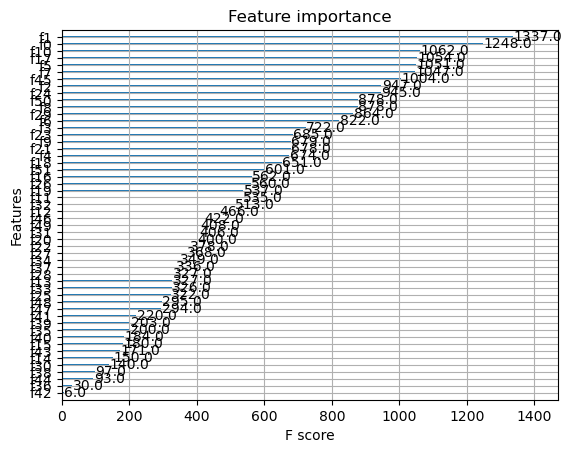

In [54]:
xgb.plot_importance(model)

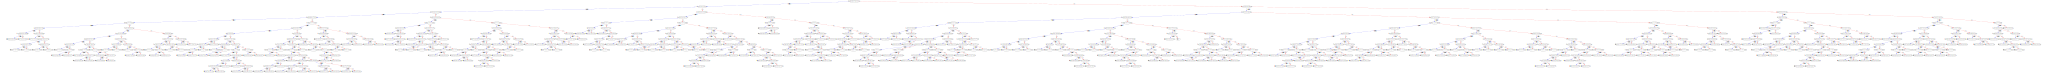

In [56]:
#xgb.plot_tree(model, num_trees=0)
xgb.to_graphviz(model, num_trees=0)

## Test predictions to submit

In [57]:
y_pred_test[df_test['Open'] == 0] = 0

In [58]:
sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()

max_depth = hyper_params['max_depth']
n_estimators = hyper_params['n_estimators']
learning_rate = hyper_params['learning_rate']
gamma = hyper_params['gamma']
sample_csv.to_csv(f'submision_xgboost_embed2_{log_output}-{max_depth}-{n_estimators}-{learning_rate}-{gamma}.csv', index=False)